<a href="https://colab.research.google.com/github/mint-rin/SeSAC/blob/main/CNN_3_RPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# 온라인 상에 있는 데이터를 받아오기 위해 필요한 모듈 import
import urllib.request
import os
import zipfile

In [ ]:
url1=  'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip '
urllib.request.urlretrieve(url1, 'rps.zip')
url2 =  'https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip '
urllib.request.urlretrieve(url2, 'rps-test-set.zip')

('rps-test-set.zip', <http.client.HTTPMessage at 0x78ea94d8a650>)

In [ ]:
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [ ]:
# 2. Data Preprocessing
rock_dir = os.path.join('./tmp/rps/rock')           # 바위
paper_dir = os.path.join('./tmp/rps/paper')         # 보
scissors_dir = os.path.join('./tmp/rps/scissors')   # 가위

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

total training rock images: 840
total training paper images: 840
total training scissors images: 840


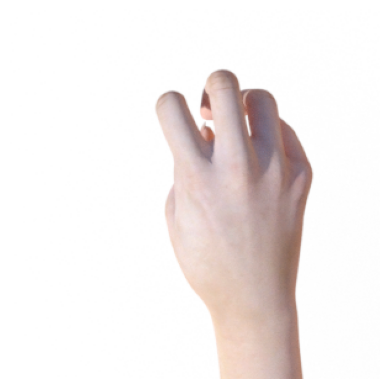

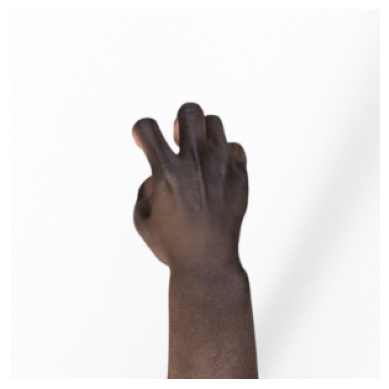

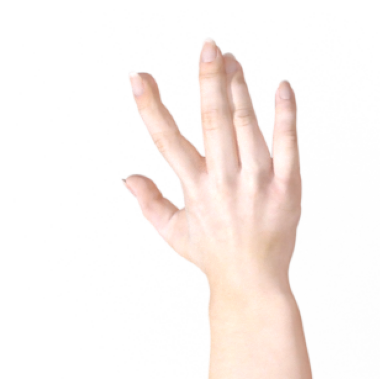

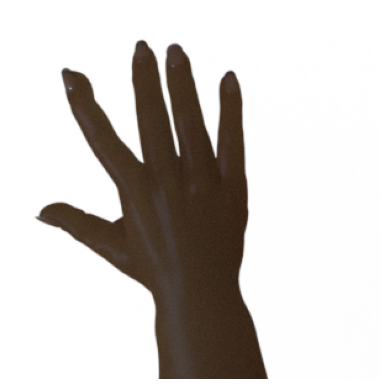

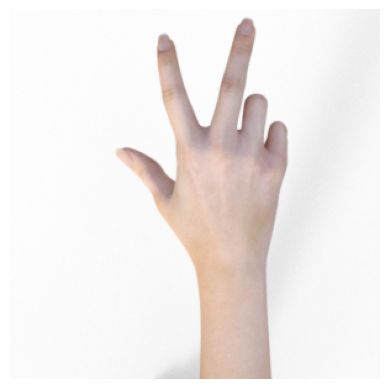

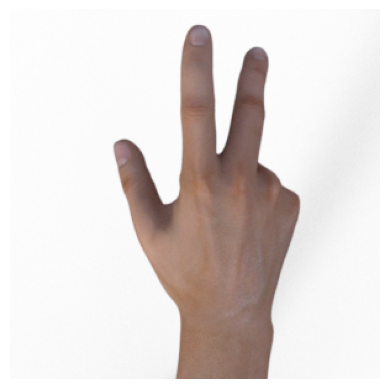

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2


next_rock = [os.path.join(rock_dir, fname)  # os.path 나의 경로를 찾음
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):   # enumerate: 데이터를 속성에 따라 분류
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# 이미지 데이터 불러오기
keras_preprocessing에 ImageDataGenerator를 사용해서 불러봅시다!

In [ ]:
# !pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
import keras_preprocessing
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'tmp/rps/'
TEST_DIR = 'tmp/rps-test-set'

training_datagen = ImageDataGenerator(rescale = 1/255.0)   # 선언, + sacale
train_generator = training_datagen.flow_from_directory(TRAINING_DIR
                                                       , target_size=(150, 150)
                                                       , class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)   # 선언, + sacale
test_generator = test_datagen.flow_from_directory(TEST_DIR
                                                       , target_size=(150, 150)
                                                       , class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [35]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3))) 	#직접
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPool2D(2,2))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(3, activation='softmax'))

In [31]:
# ImageDataGenerator는 자동으로 label을 one-hot encoding을 해주기 때문에 loss함수는 categorical_crossentropy
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])  # rmsprop

In [32]:
result = cnn.fit(train_generator, epochs = 10, batch_size = 128, validation_data = test_generator)
# train_gernerator 안에 X, y 데이터가 다 들어있기 때문에 train_generator만 적음

Epoch 1/10
79/79 [==============================] - 14s 147ms/step - loss: 0.7329 - acc: 0.6683 - val_loss: 0.4496 - val_acc: 0.7661
Epoch 2/10
79/79 [==============================] - 10s 127ms/step - loss: 0.0881 - acc: 0.9798 - val_loss: 0.2600 - val_acc: 0.8871
Epoch 3/10
79/79 [==============================] - 11s 142ms/step - loss: 5.8222e-04 - acc: 1.0000 - val_loss: 0.2853 - val_acc: 0.9220
Epoch 4/10
79/79 [==============================] - 12s 149ms/step - loss: 2.0011e-05 - acc: 1.0000 - val_loss: 0.3058 - val_acc: 0.8952
Epoch 5/10
79/79 [==============================] - 14s 172ms/step - loss: 6.3680e-06 - acc: 1.0000 - val_loss: 0.3144 - val_acc: 0.8978
Epoch 6/10
79/79 [==============================] - 11s 141ms/step - loss: 3.7609e-06 - acc: 1.0000 - val_loss: 0.3234 - val_acc: 0.8952
Epoch 7/10
79/79 [==============================] - 11s 142ms/step - loss: 2.7258e-06 - acc: 1.0000 - val_loss: 0.3278 - val_acc: 0.9005
Epoch 8/10
79/79 [==============================]

In [33]:
test_result = cnn.evaluate(test_generator)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

12/12 [==============================] - 2s 171ms/step - loss: 0.3406 - acc: 0.8978
test loss:  0.34055382013320923
test acc:  0.897849440574646
